In [1]:
import torch
import torchvision
from torchvision import transforms
from torch import nn

In [2]:
transform1 = transforms.Compose([transforms.Resize(256)
                              ,transforms.CenterCrop(224)])

In [3]:
#等价于
transform2 = nn.Sequential(transforms.Resize(256)
                        ,transforms.CenterCrop(224))

In [4]:
transform1

Compose(
    Resize(size=256, interpolation=bilinear)
    CenterCrop(size=(224, 224))
)

In [5]:
transform2

Sequential(
  (0): Resize(size=256, interpolation=bilinear)
  (1): CenterCrop(size=(224, 224))
)

In [6]:
transform = transforms.Compose([transforms.ToTensor()
                              ,transforms.Normalize(0.5,0.5)])

In [7]:
data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                     ,transform = transforms.ToTensor()
                                    )

In [8]:
data_val

Dataset LSUN
    Number of datapoints: 600
    Root location: F:\datasets2\lsun-master\data
    Classes: ['church_outdoor_val', 'classroom_val']
    StandardTransform
Transform: ToTensor()

In [9]:
data_val[0][0]

tensor([[[0.4627, 0.4627, 0.4667,  ..., 0.7137, 0.7098, 0.7098],
         [0.4627, 0.4627, 0.4667,  ..., 0.7255, 0.7176, 0.7098],
         [0.4627, 0.4627, 0.4667,  ..., 0.7333, 0.7255, 0.7176],
         ...,
         [0.3137, 0.3412, 0.3216,  ..., 0.6471, 0.6392, 0.6353],
         [0.1961, 0.2353, 0.2078,  ..., 0.6471, 0.6392, 0.6314],
         [0.1843, 0.2235, 0.1765,  ..., 0.6510, 0.6392, 0.6314]],

        [[0.5647, 0.5647, 0.5686,  ..., 0.7059, 0.7020, 0.7020],
         [0.5647, 0.5647, 0.5686,  ..., 0.7176, 0.7098, 0.7020],
         [0.5647, 0.5647, 0.5686,  ..., 0.7255, 0.7176, 0.7098],
         ...,
         [0.3176, 0.3451, 0.3216,  ..., 0.6510, 0.6431, 0.6392],
         [0.2000, 0.2392, 0.2118,  ..., 0.6510, 0.6431, 0.6353],
         [0.1882, 0.2275, 0.1804,  ..., 0.6549, 0.6431, 0.6353]],

        [[0.7882, 0.7882, 0.7922,  ..., 0.7098, 0.7059, 0.7059],
         [0.7882, 0.7882, 0.7922,  ..., 0.7216, 0.7137, 0.7059],
         [0.7882, 0.7882, 0.7922,  ..., 0.7294, 0.7216, 0.

In [10]:
data_val[0][0].max()

tensor(1.)

In [11]:
data_val[0][0].min() #所有值都在0-1之间

tensor(0.)

In [12]:
#1) 常见且通用的做法，该写法只适用于三通道图像
transforms.Normalize(mean=[0.5, 0.5, 0.5], #代表三个通道上需要减去的值分别是0.5
                     std=[0.5, 0.5, 0.5]) #代表三个通道上需要除以的值分别是0.5
#在保证数据范围在[0,1]的前提下，使用这个值可以令数据范围拓展到[-1,1]

Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

In [13]:
#也可写作：
transforms.Normalize(mean = 0.5, std = 0.5)
#这种写法中，Normalize类会根据通道数进行相应的计算，任意通道数的图像都可以使用

Normalize(mean=0.5, std=0.5)

In [14]:
#注意区分，这种写法只能用于单通道（灰度）图像
transforms.Normalize([0.5],[0.5])

Normalize(mean=[0.5], std=[0.5])

In [15]:
#2) ImageNet数据集上的均值和方差，可被用于任意实物照片分类
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])

Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [16]:
#3) MNIST数据集上的均值和方差，可被用于MNIST系列
transforms.Normalize((0.1307), (0.3081))

Normalize(mean=0.1307, std=0.3081)

In [17]:
#你也可以根据自己的数据集和自己希望实现的数值范围，来计算放入Normalize的值

In [18]:
#在LSUN数据集上尝试一下

transform = transforms.Compose([transforms.ToTensor()
                              ,transforms.Normalize(mean=[0.485, 0.456, 0.406]
                                                    ,std=[0.229, 0.224, 0.225])])

In [19]:
transform1 = transforms.Compose([transforms.ToTensor()
                              ,transforms.Normalize(0.5,0.5)])

In [20]:
data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                     ,transform = transform1
                                     )

In [21]:
data_val[1][0].max()

tensor(1.)

In [22]:
data_val[1][0].min()

tensor(-0.8824)

In [23]:
data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                    # ,transform = transforms.ToTensor()
                                     )

In [24]:
data_val[250][0].shape #尺寸一致 -> resize 256x256, RandomCrop 224x224

AttributeError: 'Image' object has no attribute 'shape'

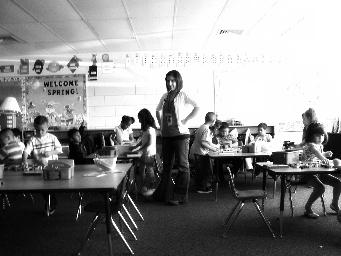

In [25]:
#原图
data_val[380][0]

In [26]:
transform_aug = transforms.Compose([transforms.Resize(256)
                                    ,transforms.RandomCrop(size=(224))
                                    ,transforms.RandomHorizontalFlip(p=1)
                                   ,transforms.ToTensor()
                                   ])

In [27]:
data_val_aug = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                     ,transform = transform_aug
                                     )

In [28]:
data_val_aug[250][0].shape

torch.Size([3, 224, 224])

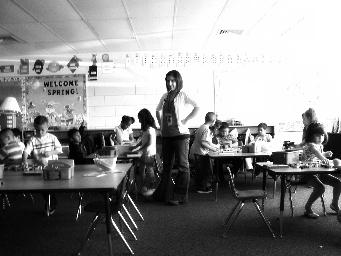

In [29]:
data_val[380][0]

In [30]:
#修改过后的图片
data_val_aug[380][0]
#对于景色数据，水平翻转和随机裁剪都可能会比较有利
#因为建筑可能位于图像的任何地方，而根据尝试，水平翻转后的图像也能够被一眼看出是什么景色

tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.4392, 0.4314, 0.4314],
         [0.9961, 0.9961, 0.9961,  ..., 0.4353, 0.4275, 0.4392],
         [0.9961, 0.9961, 0.9961,  ..., 0.4235, 0.4157, 0.4235],
         ...,
         [0.1255, 0.1255, 0.1216,  ..., 0.0392, 0.0353, 0.0510],
         [0.1137, 0.1255, 0.1373,  ..., 0.0392, 0.0353, 0.0510],
         [0.1294, 0.1333, 0.1294,  ..., 0.0392, 0.0353, 0.0431]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.4392, 0.4314, 0.4314],
         [0.9961, 0.9961, 0.9961,  ..., 0.4353, 0.4275, 0.4392],
         [0.9961, 0.9961, 0.9961,  ..., 0.4235, 0.4157, 0.4235],
         ...,
         [0.1255, 0.1255, 0.1216,  ..., 0.0392, 0.0353, 0.0510],
         [0.1137, 0.1255, 0.1373,  ..., 0.0392, 0.0353, 0.0510],
         [0.1294, 0.1333, 0.1294,  ..., 0.0392, 0.0353, 0.0431]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.4392, 0.4314, 0.4314],
         [0.9961, 0.9961, 0.9961,  ..., 0.4353, 0.4275, 0.4392],
         [0.9961, 0.9961, 0.9961,  ..., 0.4235, 0.4157, 0.

In [31]:
#定义transform
transform = transforms.Compose([transforms.Resize(256) #先对尺寸进行操作
                                ,transforms.RandomCrop(size=(224))
                                ,transforms.RandomHorizontalFlip(p=1) #再进行翻转、旋转等操作
                                ,transforms.RandomRotation(degrees=(-70,70))
                                ,transforms.ToTensor() #对图片都处理完成后，转换为Tensor
                                ,transforms.Normalize(mean=[0.485, 0.456, 0.406] #最后进行归一化
                                                      ,std=[0.229, 0.224, 0.225])])

In [32]:
#导入数据
data_train = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                       ,classes=["church_outdoor_train","classroom_train"]
                                       ,transform = transform)

In [33]:
data_train[0][0].shape

torch.Size([3, 224, 224])

In [34]:
data_train[0][0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1